In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("data/heart_disease_clean.csv")
df.head()


,age,trestbps,chol,thalach,oldpeak,ca,num,sex_female,sex_male,cp_asymptomatic,...,restecg_normal,restecg_showing probable,exang_no,exang_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,0.0,0,False,True,False,...,False,True,True,False,True,False,False,True,False,False
1,67,160,286,108,1.5,3.0,1,False,True,True,...,False,True,False,True,False,True,False,False,True,False
2,67,120,229,129,2.6,2.0,1,False,True,True,...,False,True,False,True,False,True,False,False,False,True
3,37,130,250,187,3.5,0.0,0,False,True,False,...,True,False,True,False,True,False,False,False,True,False
4,41,130,204,172,1.4,0.0,0,True,False,False,...,False,True,True,False,False,False,True,False,True,False


In [12]:
X = df.drop("num", axis=1)
y = (df["num"] > 0).astype(int)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\eslam\AppData\Local\Temp\ipykernel_19548\1007251852.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


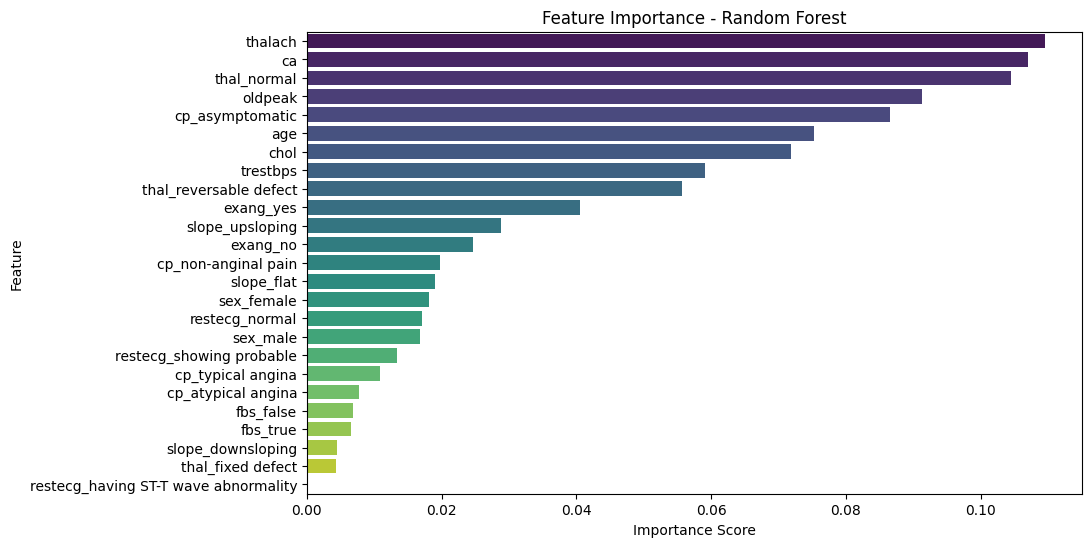


Random Forest Feature Importance Ranking:
thalach                                 0.109558
ca                                      0.107005
thal_normal                             0.104579
oldpeak                                 0.091339
cp_asymptomatic                         0.086606
age                                     0.075252
chol                                    0.071855
trestbps                                0.059058
thal_reversable defect                  0.055743
exang_yes                               0.040553
slope_upsloping                         0.028870
exang_no                                0.024670
cp_non-anginal pain                     0.019783
slope_flat                              0.019043
sex_female                              0.018097
restecg_normal                          0.017016
sex_male                                0.016720
restecg_showing probable                0.013374
cp_typical angina                       0.010873
cp_atypical angina        

In [13]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

print("\nRandom Forest Feature Importance Ranking:")
print(importances)

In [14]:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(log_reg, n_features_to_select=10)
rfe.fit(X_scaled, y)

rfe_features = pd.Series(rfe.support_, index=X.columns)
print("\nTop Features selected by RFE:")
print(rfe_features[rfe_features == True].index.tolist())


Top Features selected by RFE:
['trestbps', 'thalach', 'oldpeak', 'ca', 'sex_female', 'cp_asymptomatic', 'cp_non-anginal pain', 'exang_no', 'slope_upsloping', 'thal_reversable defect']


C:\Users\eslam\AppData\Local\Temp\ipykernel_19548\4112996446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chi2_scores, y=chi2_scores.index, palette="coolwarm")


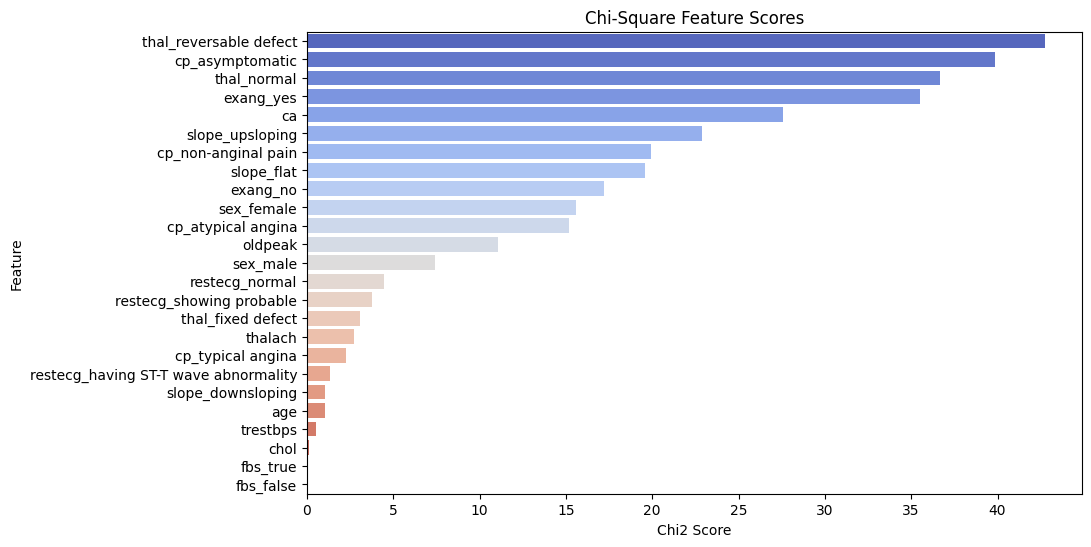


Chi-Square Test Ranking:
thal_reversable defect                  42.750381
cp_asymptomatic                         39.848093
thal_normal                             36.654197
exang_yes                               35.508090
ca                                      27.576871
slope_upsloping                         22.888726
cp_non-anginal pain                     19.952415
slope_flat                              19.559145
exang_no                                17.221424
sex_female                              15.586284
cp_atypical angina                      15.195889
oldpeak                                 11.059763
sex_male                                 7.444195
restecg_normal                           4.490794
restecg_showing probable                 3.742914
thal_fixed defect                        3.055566
thalach                                  2.717718
cp_typical angina                        2.279403
restecg_having ST-T wave abnormality     1.341800
slope_downsloping       

In [15]:
chi2_selector = SelectKBest(score_func=chi2, k="all")
chi2_selector.fit(X_scaled, y)
chi2_scores = pd.Series(chi2_selector.scores_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=chi2_scores, y=chi2_scores.index, palette="coolwarm")
plt.title("Chi-Square Feature Scores")
plt.xlabel("Chi2 Score")
plt.ylabel("Feature")
plt.show()

print("\nChi-Square Test Ranking:")
print(chi2_scores)

In [16]:
selected_features = list(importances.head(7).index) + rfe_features[rfe_features==True].index.tolist()
selected_features = list(set(selected_features))

X_reduced = X[selected_features]
print("\nFinal Selected Features:")
print(selected_features)

print("\nReduced Dataset Shape:", X_reduced.shape)


Final Selected Features:
['thal_reversable defect', 'oldpeak', 'thal_normal', 'cp_asymptomatic', 'chol', 'slope_upsloping', 'trestbps', 'cp_non-anginal pain', 'exang_no', 'sex_female', 'thalach', 'age', 'ca']

Reduced Dataset Shape: (297, 13)


In [17]:
X_reduced

,thal_reversable defect,oldpeak,thal_normal,cp_asymptomatic,chol,slope_upsloping,trestbps,cp_non-anginal pain,exang_no,sex_female,thalach,age,ca
0,False,2.3,False,False,233,False,145,False,True,False,150,63,0.0
1,False,1.5,True,True,286,False,160,False,False,False,108,67,3.0
2,True,2.6,False,True,229,False,120,False,False,False,129,67,2.0
3,False,3.5,True,False,250,False,130,True,True,False,187,37,0.0
4,False,1.4,True,False,204,True,130,False,True,True,172,41,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,True,0.2,False,True,241,False,140,False,False,True,123,57,0.0
293,True,1.2,False,False,264,False,110,False,True,False,132,45,0.0
294,True,3.4,False,True,193,False,144,False,True,False,141,68,2.0
295,True,1.2,False,True,131,False,130,False,False,False,115,57,1.0


In [19]:
df = X_reduced.copy()
df["num"] = y

In [20]:
df.to_csv("data/heart_disease_selected_features.csv", index=False)